# Predict the Success of Bank telemarketing

This project aims to predict whether a client will subscribe to a bank term deposit based on the data collected from direct marketing campaigns.

The goal is to develop a machine learning model that can accurately predict the likelihood of subscription. This prediction can help the bank optimize its marketing strategy and improve targeting efforts for future campaigns.

## About Data

The data used in this notebook has been taken from [`kaggle`](https://www.kaggle.com/competitions/predict-the-success-of-bank-telemarketing/data)

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Files

- **`train.csv`**: The training dataset.  
- **`test.csv`**: The test dataset.  
- **`sample_submission.csv`**: A sample submission file in the correct format.  


## Data Dictionary

- `last contact date` : last contact date  
- `age` : age (numeric)  
- `job` : type of job  
- `marital` : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)  
- `education` : education level (categorical: "unknown", "secondary", "primary", "tertiary")  
- `default` : has credit in default? (binary: "yes", "no")  
- `balance` : average yearly balance, in euros (numeric)  
- `housing` : has housing loan? (binary: "yes", "no")  
- `loan` : has personal loan? (binary: "yes", "no")  
- `contact` : contact communication type (categorical: "unknown", "telephone", "cellular")  
- `duration` : last contact duration, in seconds (numeric)  
- `campaign` : number of contacts performed during this campaign and for this client (numeric, includes last contact)  
- `pdays` : number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
- `previous` : number of contacts performed before this campaign and for this client (numeric) 
- `poutcome` : outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- `target` :  has the client subscribed a term deposit? (binary: "yes","no")

**Data Explanation**

1. **Last Contact Date**: The date when the bank last contacted the client.
2. **Age**: Age of the client.
3. **Job**: The type of job the client has.
4. **Marital**: The client's marital status.
5. **Education**: The client's education level.
6. **Default**: Whether the client has a credit in default (meaning they owe money and haven’t paid). "Yes" or "No."
7. **Balance**: The client's average yearly bank balance.
8. **Housing**: Whether the client has a housing loan. "Yes" or "No."
9. **Loan**: Whether the client has a personal loan. "Yes" or "No."
10. **Contact**: The type of communication used to reach the client.
11. **Duration**: How long the last contact with the client lasted.
12. **Campaign**: The total number of times the client was contacted during the current marketing campaign.
13. **Pdays**: The number of days since the client was last contacted in a previous marketing campaign. A value of "-1" means the client wasn't contacted before.
14. **Previous**: The number of times the client was contacted in previous campaigns.
15. **Poutcome**: The outcome of the previous marketing campaign.
16. **Target**: The target variable, which indicates whether the client subscribed to a bank term deposit. "Yes" means they did, and "No" means they didn't.


## Table of Contents

- Standard Imports
- Data Loading
- EDA
- Data Preprocessing
- Model Training
- Model Analysis
- Hyperparameter Tuning
- Prediction on Tandst bmissionent here.


### Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [3]:
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
test.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [4]:
sample_submission = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')
sample_submission.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes


In [5]:
print(f'Shape of Train data: {data.shape}')
print(f'Shape of Test data: {test.shape}')

Shape of Train data: (39211, 16)
Shape of Test data: (10000, 15)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [7]:
data.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df_copy_1 = data.copy()

## EDA (Exploaratory Data Analysis)

### Data Visualization

#### Count plot for categorical columns

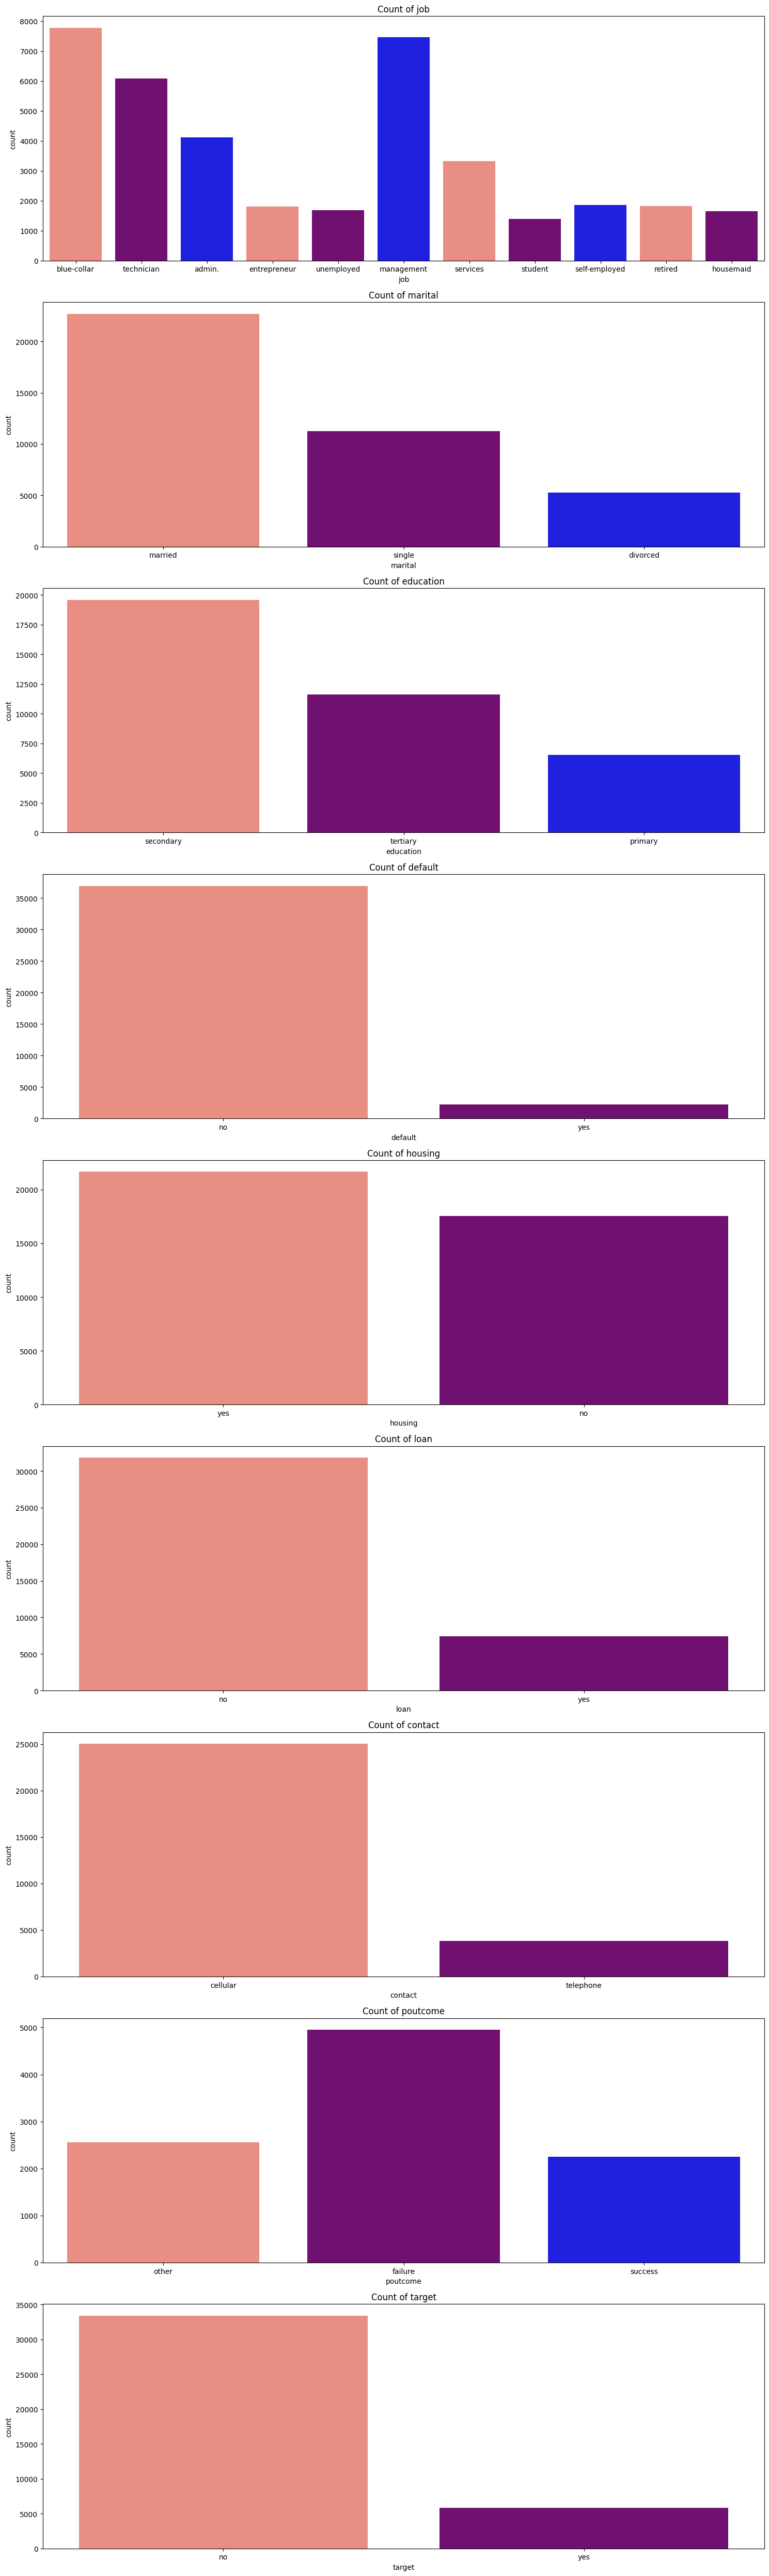

In [9]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target']
fig, ax = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(15, 50))

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=data, ax=ax[i], palette=['salmon', 'purple', 'blue'])
    ax[i].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

#### Pie chart for target 

In [10]:
data.target.value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

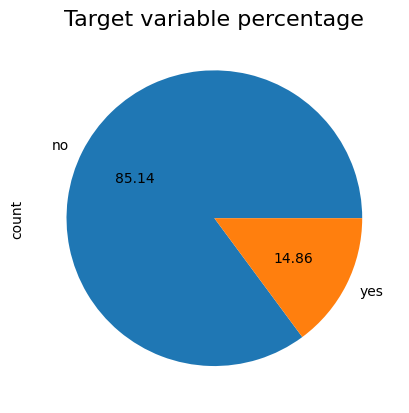

In [11]:
data.target.value_counts().plot(kind = 'pie', autopct='%.2f')
plt.title("Target variable percentage",fontsize = 16)
plt.show()

**Analysis:**
* From the above pie chart, we can see that our data is highly imbalanced with more data points having target as 'no'

`no`  -   33384

`yes`  -   5827

#### Histograms of Numerical Features Based on Target Variable

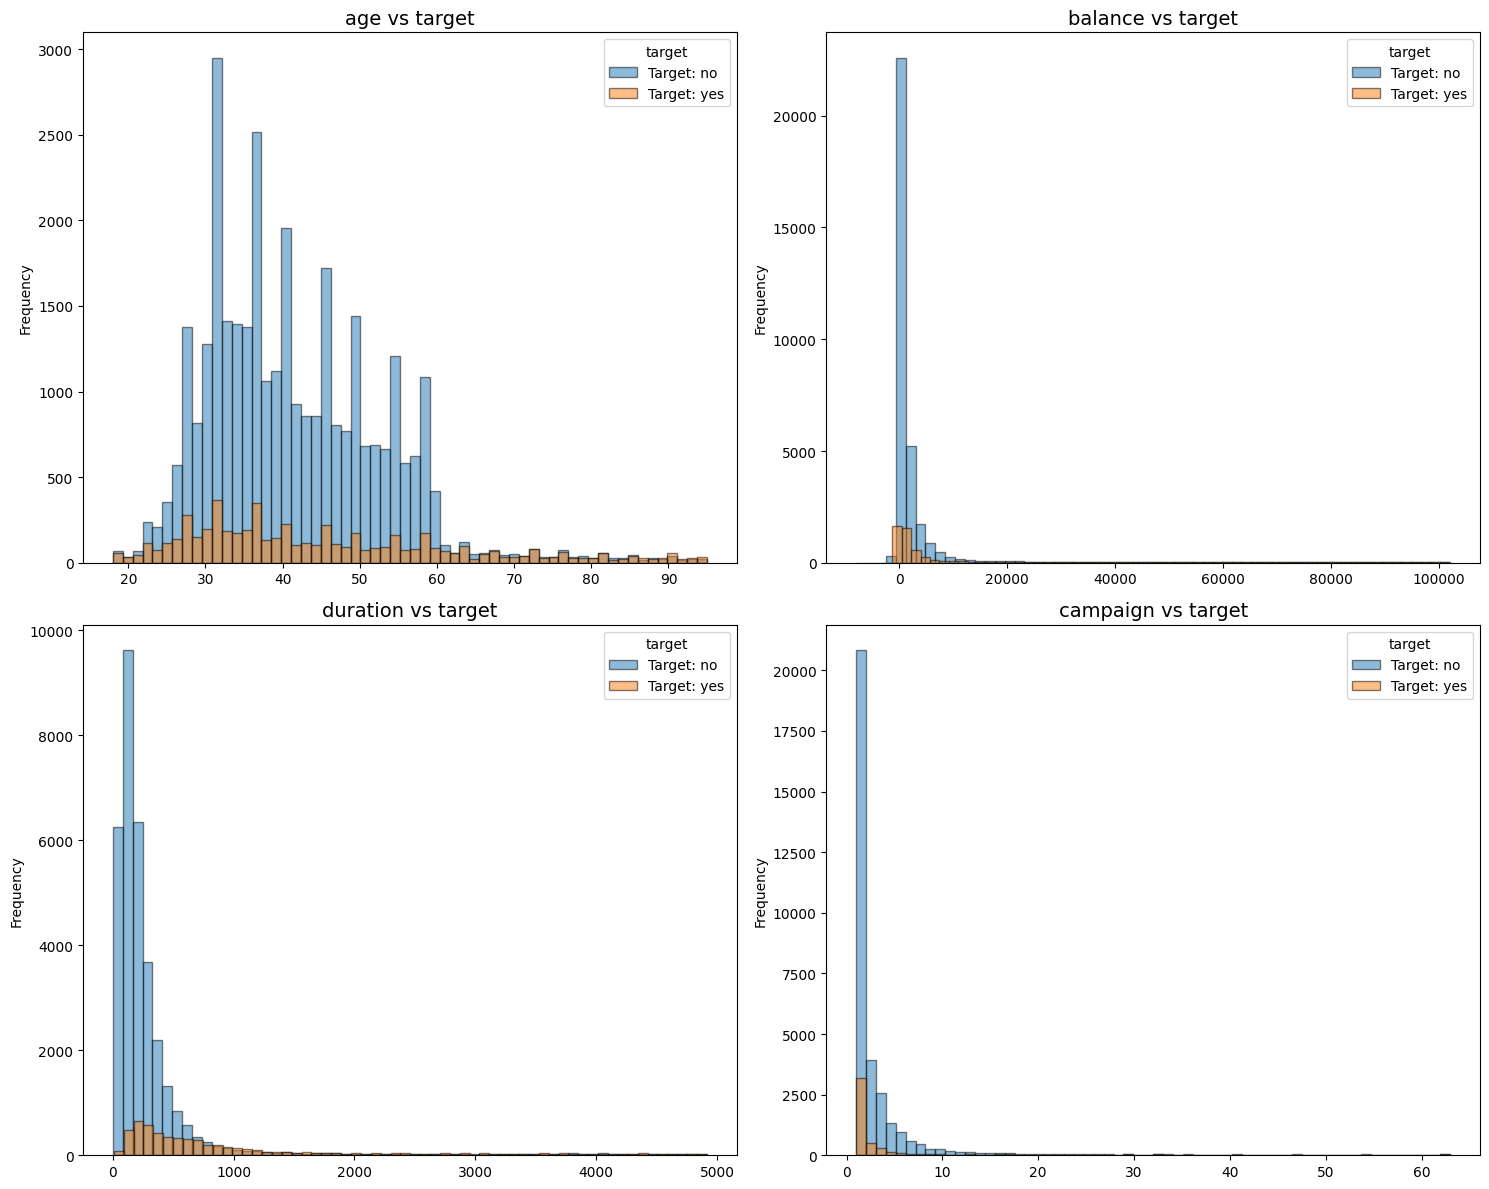

In [12]:
num_cols = ['age', 'balance', 'duration', 'campaign']
target_col = 'target'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):  
    for target in data[target_col].unique():
        subset = data[data[target_col] == target]
        
        # Create histogram for the current numerical column
        axes[i].hist(subset[col], bins=60, alpha=0.5, label=f'Target: {target}', 
                     edgecolor='k')

    axes[i].set_title(f'{col} vs {target_col}', fontsize=14)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title=target_col)

plt.tight_layout()
plt.show()

**Analysis:**
1. `age vs target` : The majority of individuals who did not subscribe to the target are concentrated in the age group of 30-50, with a peak around the mid-30s to 40s.
Middle-aged individuals are more likely to not convert compared to younger or older individuals.

2. `balance vs target`: The distribution is highly skewed towards right indicating most individuals have low balances and balance does not seem to be a strong differentiator between people who subscribed and those who didn't. The financial status of users may not strongly determine the likelihood of conversion.

3. `duration vs target` : The distribution is highly skewed towards right and duration shows a strong difference between the no and yes classes. We can also observe that longer durations correspond to higher chances of conversion.

4. `campaign vs target` : The majority of both no and yes responses are heavily skewed towards lower campaign counts. Excessive campaign contacts might reduce conversion chances, potentially due to customer fatigue or annoyance.

In [13]:
data.job.value_counts()

job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64

In [14]:
data.job = data.job.str.replace(".", "")

In [15]:
test.job = test.job.str.replace(".", "")

#### Average age by job

In [16]:
age_job=pd.pivot_table(data, values='age', index='job', aggfunc='mean')
age_job

,age
job,
admin,39.249514
blue-collar,40.027906
entrepreneur,46.975069
housemaid,50.285628
management,40.418521
retired,61.592654
self-employed,45.887218
services,38.597293
student,39.420675


<Figure size 1200x800 with 0 Axes>

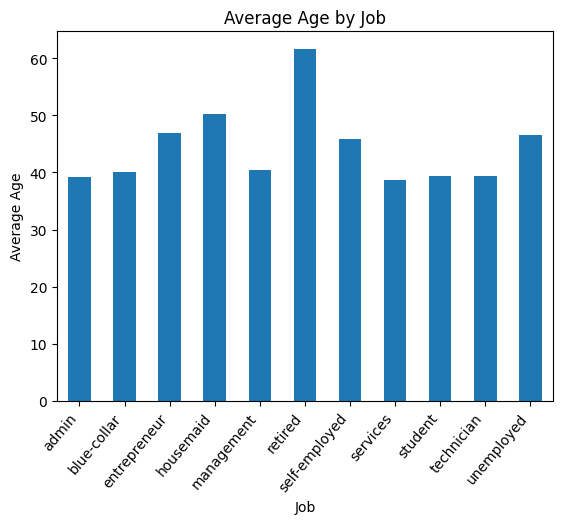

In [17]:
plt.figure(figsize=(12,8))
age_job.plot(kind='bar', legend=False)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=50, ha='right')
plt.show()

#### Marital status & Education

In [18]:
data.education.value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

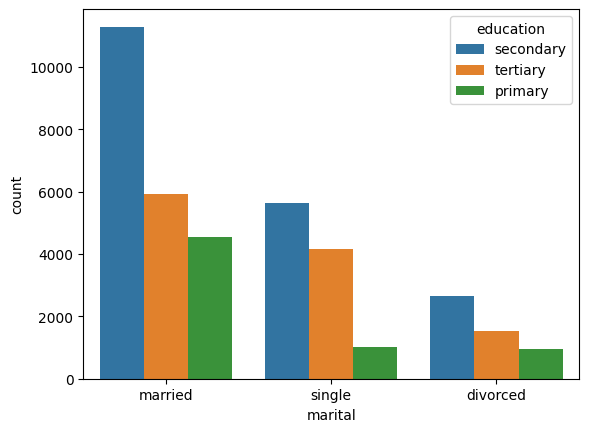

In [19]:
sns.countplot(data=data, x='marital', hue='education')
plt.show()

#### Monthly Subscription Trends

In [20]:
df_copy = data.copy()
df_copy.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


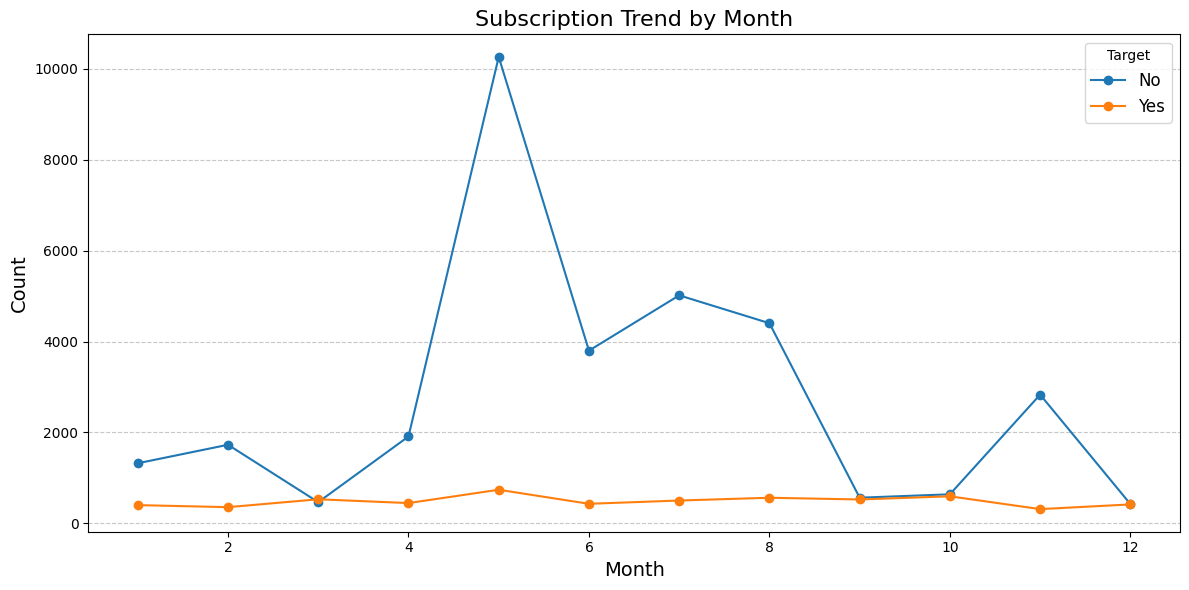

In [21]:
df_copy['last contact date'] = pd.to_datetime(df_copy['last contact date'], format='%Y-%m-%d')

df_copy['month'] = df_copy['last contact date'].dt.month

monthly_target = df_copy.groupby(['month', 'target']).size().unstack() #  summarize the count of occurrences of combinations of month and target

monthly_target.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Subscription Trend by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Target', labels=['No', 'Yes'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis**

* The number of non-subscribers is significantly higher than the number of subscribers across all months.
* May shows the highest number of non-subscribers, with a sharp spike compared to other months.
* The number of subscribers is consistent throughout the year, with only slight increases or decreases.

#### Correlation Matrix

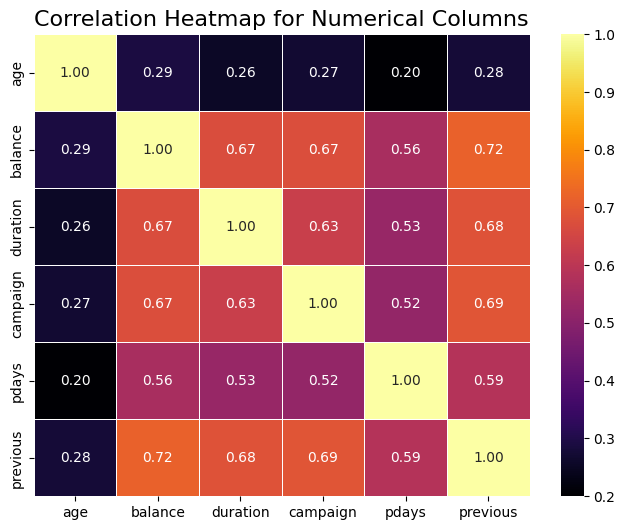

In [22]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']  
corr_matrix = data[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', linewidths=0.5, fmt='.2f')

plt.title('Correlation Heatmap for Numerical Columns', fontsize=16)
plt.show()

**Analysis**:
* We can see high correlation between (`balance` & `previous`)

## Data Preprocessing

### Handling Date column - `last contact date`

Breaking the `last contact date` column into `month` and `day` columns to make it usable

In [23]:
# Convert the 'last contact date' column to datetime and extract day and month features
data['last contact date'] = pd.to_datetime(data['last contact date'], errors='coerce')
data['day'] = data['last contact date'].dt.day
data['month'] = data['last contact date'].dt.month
data = data.drop(['last contact date'], axis=1)

test['last contact date'] = pd.to_datetime(test['last contact date'], errors='coerce')
test['day'] = test['last contact date'].dt.day
test['month'] = test['last contact date'].dt.month
test = test.drop(['last contact date'], axis=1)

### Checking Missing Values & Duplicates

In [24]:
data.isnull().sum()

age              0
job            229
marital          0
education     1467
default          0
balance          0
housing          0
loan             0
contact      10336
duration         0
campaign         0
pdays            0
previous         0
poutcome     29451
target           0
day              0
month            0
dtype: int64

In [25]:
test.isnull().sum()

age             0
job            59
marital         0
education     390
default         0
balance         0
housing         0
loan            0
contact      2684
duration        0
campaign        0
pdays           0
previous        0
poutcome     7508
day             0
month           0
dtype: int64

we can observe that the columns with missing values are all categorical columns.

**Checking for duplicates**

In [26]:
df_with_dup = data[data.duplicated(keep = 'last')]
df_with_dup.shape

(0, 17)

In [27]:
test_with_dup = test[test.duplicated(keep = 'last')]
test_with_dup.shape

(0, 16)

No duplicates found

### Filling missing categorical values with Unknown

In [28]:
categorical_cols = ['job', 'education', 'poutcome', 'contact']
def fill_missing_with_unknown(df, cols):
    for col in cols:
        df[col] = df[col].fillna('Unknown')


fill_missing_with_unknown(data, categorical_cols)
fill_missing_with_unknown(test, categorical_cols)


In [29]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
day          0
month        0
dtype: int64

### Outlier Capping

In [30]:
numerical_columns = ['age', 'balance', 'campaign', 'pdays', 'previous', 'month', 'day']

In [31]:
print(data['pdays'].value_counts())
print('-------------------------------')
print(data['previous'].value_counts())

pdays
-1      29446
 182      135
 92       117
 91       106
 183      100
        ...  
 836        1
 594        1
 659        1
 817        1
 724        1
Name: count, Length: 865, dtype: int64
-------------------------------
previous
0      29456
1       2226
2       1708
3        907
4        590
       ...  
163        5
76         5
180        5
137        5
231        4
Name: count, Length: 276, dtype: int64


We observe that several of our data characteristics (pdays and previous) include negative values and the number 0. In such instances, square root transform or logarithmic transformation cannot be employed since negative numbers cannot be squared and zero logarithm is not defined.

So, we apply **Winsorization**

- In this, we set a 90% confidence interval and then replaced all outliers below the 5th percentile with the 5th percentile value and all values above the 95th percentile with the 95th percentile value.

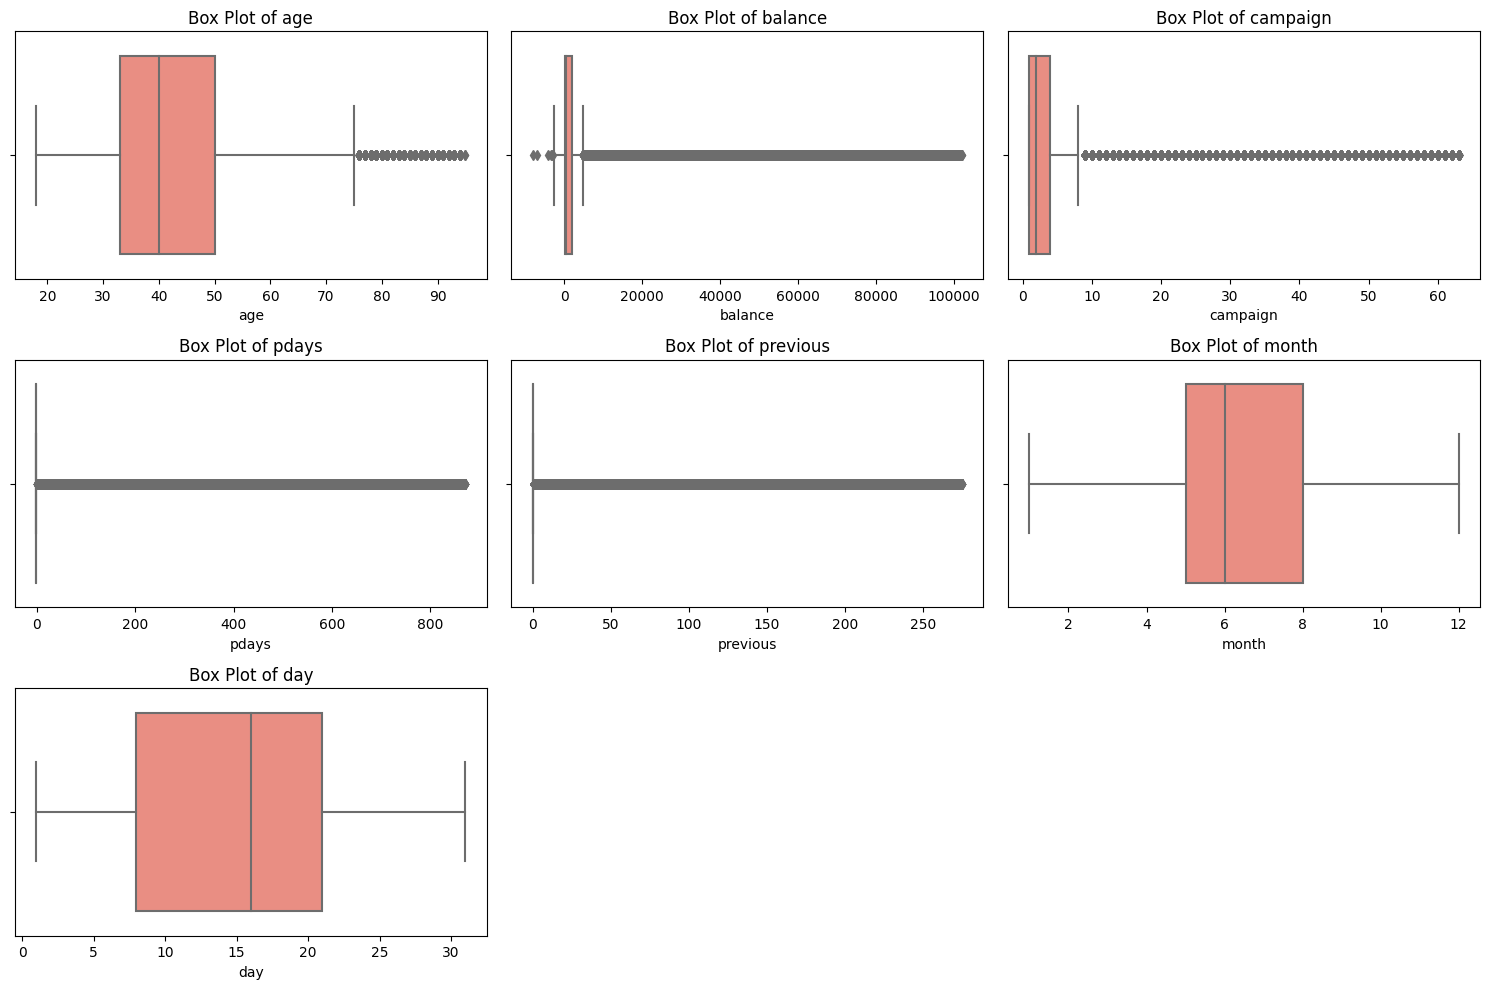

In [32]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  
    sns.boxplot(x=data[column], color='salmon')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
   
plt.tight_layout() 
plt.show()

In [33]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

lower_thresholds = data[numerical_cols].quantile(0.05)
upper_thresholds = data[numerical_cols].quantile(0.95)

for column in numerical_cols:
    data[column] = data[column].clip(lower=lower_thresholds[column], upper=upper_thresholds[column])

for column in numerical_cols:
    if column in test.columns:  
        test[column] = test[column].clip(lower=lower_thresholds[column], upper=upper_thresholds[column])

print("Winsorized Train Data:")
data.head()

Winsorized Train Data:


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,day,month
0,26,blue-collar,married,secondary,no,647.0,yes,no,cellular,357.0,2,331,1,other,no,17,4
1,52,technician,married,secondary,no,553.0,yes,no,telephone,160.0,1,-1,0,Unknown,no,11,10
2,44,blue-collar,married,secondary,no,1397.0,no,no,cellular,326.0,1,-1,0,Unknown,no,20,11
3,33,admin,married,secondary,no,394.0,yes,no,telephone,104.0,3,-1,0,Unknown,no,1,9
4,31,entrepreneur,single,tertiary,no,137.0,no,no,cellular,445.0,2,-1,0,Unknown,no,29,1


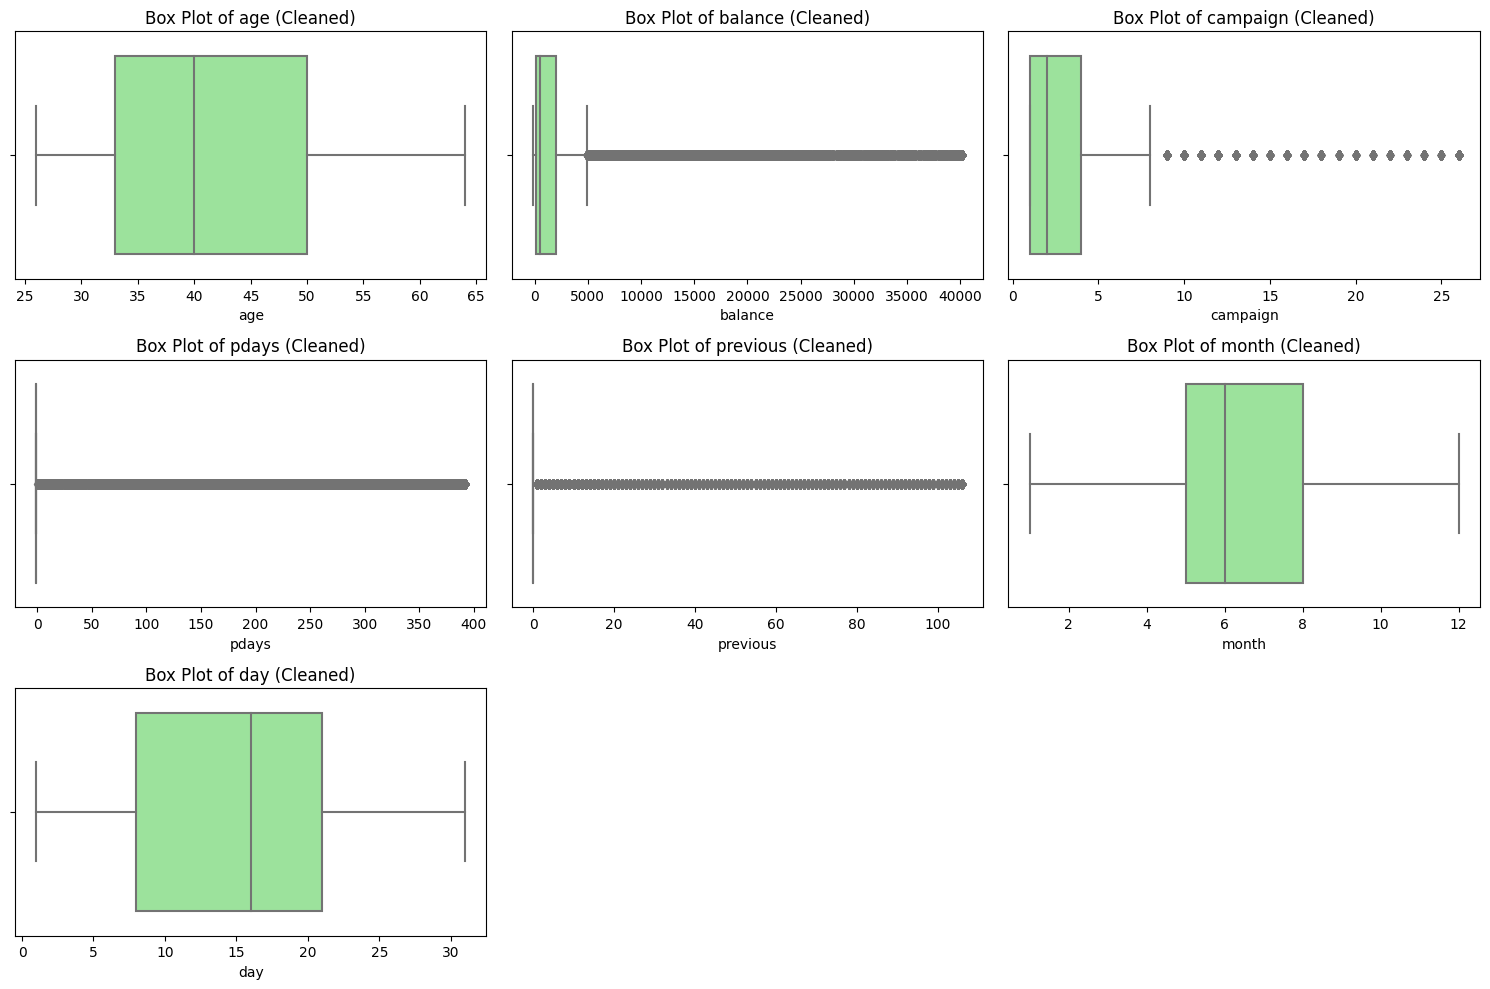

In [34]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f'Box Plot of {column} (Cleaned)')
    plt.xlabel(column)

plt.tight_layout() 
plt.show()

### Data Encoding and Transformation

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Function to encode categorical columns using one-hot encoding
def encode_categorical_columns(df, cols):
    df = pd.get_dummies(df, columns=cols, drop_first=True) # drop_first removes the first category's dummy variable to avoid multicollinearity.
    return df
    
# Apply encoding to training and test datasets
data = encode_categorical_columns(data, categorical_cols)
test = encode_categorical_columns(test, categorical_cols)

# Label encode the target column
target_le = LabelEncoder()
data['target'] = target_le.fit_transform(data['target'])

# Store the label encoder for target column for later use in submission
label_encoders['target'] = target_le

In [36]:
test.shape

(10000, 32)

In [37]:
data.shape

(39211, 33)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  39211 non-null  int64  
 1   balance              39211 non-null  float64
 2   duration             39211 non-null  float64
 3   campaign             39211 non-null  int64  
 4   pdays                39211 non-null  int64  
 5   previous             39211 non-null  int64  
 6   target               39211 non-null  int64  
 7   day                  39211 non-null  int32  
 8   month                39211 non-null  int32  
 9   job_admin            39211 non-null  bool   
 10  job_blue-collar      39211 non-null  bool   
 11  job_entrepreneur     39211 non-null  bool   
 12  job_housemaid        39211 non-null  bool   
 13  job_management       39211 non-null  bool   
 14  job_retired          39211 non-null  bool   
 15  job_self-employed    39211 non-null 

### Handling Class Imbalance

- For handling the class imbalance, I have used oversampling for the minority class using `SMOTE`
- `SMOTE (Synthetic Minority Over-sampling Technique)` is used to handle class imbalance by generating synthetic samples for the minority class rather than just duplicating existing samples.
    
    1. Identifying minority class samples.
    2. Finding nearest neighbors for each minority sample.
    3. Creating synthetic samples by mixing (interpolating) between the sample and its neighbors.
    4. Repeating the process until the minority class is oversampled sufficiently.

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X = data.drop('target', axis=1) 
y = data['target']               
X.shape, y.shape

((39211, 32), (39211,))

**Data Splitting**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31368, 32), (7843, 32), (31368,), (7843,))

**Data Resampling**

In [42]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Resampled Train shapes:", X_train_resampled.shape, y_train_resampled.shape)

Resampled Train shapes: (53478, 32) (53478,)


In [43]:
df_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
df_train_resampled['target'] = y_train_resampled
df_train_resampled.shape

(53478, 33)

In [44]:
df_train_resampled['target'].value_counts()


target
0    26739
1    26739
Name: count, dtype: int64

Class After sampling
Percentage of 'yes' in 'target': 50.0
Percentage of 'no' in 'target': 50.0


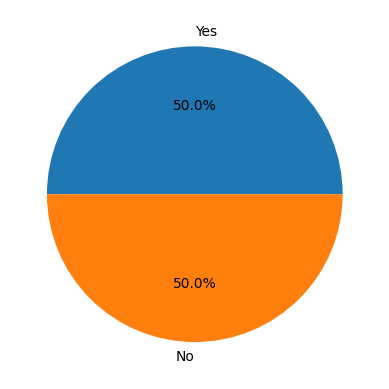

In [45]:
yes_count = (df_train_resampled['target'] == 1).sum()
no_count = (df_train_resampled['target'] == 0).sum()

# Calculate the total count of values in the 'target' column
total_count = len(df_train_resampled)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("Class After sampling")
print("Percentage of 'yes' in 'target':", percentage_yes)
print("Percentage of 'no' in 'target':", percentage_no)


labels = ['Yes', 'No']
sizes = [percentage_yes, percentage_no]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Model Training

**Custom Function for evaluating models**

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

def get_metrics(model, X_train, y_train, X_test, y_test):

    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Training Accuracy:", train_accuracy)
    print('-------------------------------------------------------------------')
    # Make predictions on the test data
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
    print("\nTest Accuracy:", test_accuracy)
    print("Test F1 Score (Weighted):", test_f1)
    print("Test F1 Score (Macro Average):", test_f1_macro)
    print('-------------------------------------------------------------------')

    # Generate and print the classification report for the test set
    print("\nClassification Report for Test Set:")
    print(classification_report(y_test, y_test_pred))
    print('-------------------------------------------------------------------')

    # Generate and print the confusion matrix for the test set
    print("\nConfusion Matrix for Test Set:")
    print(confusion_matrix(y_test, y_test_pred))
    print('-------------------------------------------------------------------')


### Random Forest Classifier Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion = 'entropy', class_weight = 'balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [48]:
get_metrics(rf_model, X_train_resampled, y_train_resampled, X_val, y_val)

Training Accuracy: 1.0
-------------------------------------------------------------------

Test Accuracy: 0.8647201326023205
Test F1 Score (Weighted): 0.5521317011397214
Test F1 Score (Macro Average): 0.7362295511030138
-------------------------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6645
           1       0.56      0.55      0.55      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.73      0.74      7843
weighted avg       0.86      0.86      0.86      7843

-------------------------------------------------------------------

Confusion Matrix for Test Set:
[[6128  517]
 [ 544  654]]
-------------------------------------------------------------------


**Feature importance of random forest model**

In [49]:
feature_importance = rf_model.feature_importances_
feature_names = X_train_resampled.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

duration: 0.2208
balance: 0.0676
poutcome_success: 0.0669
month: 0.0531
contact_cellular: 0.0526
day: 0.0489
pdays: 0.0447
age: 0.0440
education_secondary: 0.0399
education_tertiary: 0.0364
previous: 0.0353
marital_married: 0.0337
campaign: 0.0310
contact_telephone: 0.0269
marital_single: 0.0263
education_primary: 0.0184
job_management: 0.0149
job_student: 0.0146
job_retired: 0.0134
housing_yes: 0.0125
job_technician: 0.0123
poutcome_other: 0.0109
job_admin: 0.0105
poutcome_failure: 0.0103
job_blue-collar: 0.0102
loan_yes: 0.0085
default_yes: 0.0071
job_unemployed: 0.0068
job_services: 0.0060
job_self-employed: 0.0054
job_housemaid: 0.0053
job_entrepreneur: 0.0048


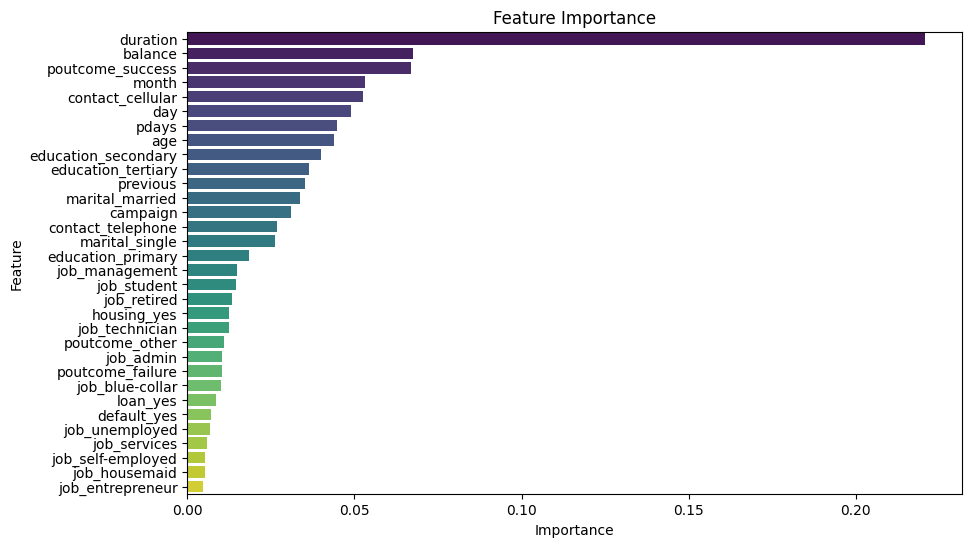

In [50]:
features, importances = zip(*sorted_feature_importance)

df_importance = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [51]:
threshold = 0.01
selected_features = df_importance[df_importance['Importance'] >= threshold]['Feature']

# Drop low-importance features
X_train_reduced = X_train_resampled[selected_features]
X_val_reduced = X_val[selected_features]

rf_model_reduced = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train_resampled)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [52]:
get_metrics(rf_model_reduced, X_train_reduced, y_train_resampled, X_val_reduced, y_val)

Training Accuracy: 1.0
-------------------------------------------------------------------

Test Accuracy: 0.8652301415274767
Test F1 Score (Weighted): 0.5586638830897704
Test F1 Score (Macro Average): 0.7395681916389338
-------------------------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6645
           1       0.56      0.56      0.56      1198

    accuracy                           0.87      7843
   macro avg       0.74      0.74      0.74      7843
weighted avg       0.87      0.87      0.87      7843

-------------------------------------------------------------------

Confusion Matrix for Test Set:
[[6117  528]
 [ 529  669]]
-------------------------------------------------------------------


### XGBoost Model

In [53]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [54]:
get_metrics(xgb_model, X_train_resampled, y_train_resampled, X_val, y_val)

Training Accuracy: 0.955271326526796
-------------------------------------------------------------------

Test Accuracy: 0.87147775086064
Test F1 Score (Weighted): 0.5605928509154315
Test F1 Score (Macro Average): 0.7426620168555653
-------------------------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6645
           1       0.59      0.54      0.56      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.73      0.74      7843
weighted avg       0.87      0.87      0.87      7843

-------------------------------------------------------------------

Confusion Matrix for Test Set:
[[6192  453]
 [ 555  643]]
-------------------------------------------------------------------


### LightGBM Model

In [55]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)

lgb_model.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 26739, number of negative: 26739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 53478, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [56]:
get_metrics(lgb_model, X_train_resampled, y_train_resampled, X_val, y_val)

Training Accuracy: 0.9286809529152175
-------------------------------------------------------------------

Test Accuracy: 0.8661226571465
Test F1 Score (Weighted): 0.5671887881286067
Test F1 Score (Macro Average): 0.7440016338833079
-------------------------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6645
           1       0.56      0.57      0.57      1198

    accuracy                           0.87      7843
   macro avg       0.74      0.75      0.74      7843
weighted avg       0.87      0.87      0.87      7843

-------------------------------------------------------------------

Confusion Matrix for Test Set:
[[6105  540]
 [ 510  688]]
-------------------------------------------------------------------


### Non-Tree Models

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', MinMaxScaler()), 
        ('classifier', LogisticRegression(random_state=42))
    ]),
    "SVM": Pipeline([
        ('scaler', MinMaxScaler()), 
        ('classifier', SVC(random_state=42))
    ]),
    "KNN": Pipeline([
        ('scaler', MinMaxScaler()), 
        ('classifier', KNeighborsClassifier())
    ])
}

for model_name, pipeline in pipelines.items():
    print(f"\n### {model_name} ###\n")
    pipeline.fit(X_train_resampled, y_train_resampled)
    get_metrics(pipeline, X_train_resampled, y_train_resampled, X_val, y_val)


### Logistic Regression ###

Training Accuracy: 0.9059426306144582
-------------------------------------------------------------------

Test Accuracy: 0.8570699987249777
Test F1 Score (Weighted): 0.43469490670700955
Test F1 Score (Macro Average): 0.6764440015546286
-------------------------------------------------------------------

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6645
           1       0.55      0.36      0.43      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.65      0.68      7843
weighted avg       0.84      0.86      0.84      7843

-------------------------------------------------------------------

Confusion Matrix for Test Set:
[[6291  354]
 [ 767  431]]
-------------------------------------------------------------------

### SVM ###

Training Accuracy: 0.9217809192565167
------------------------------------------------------

## Model Analysis

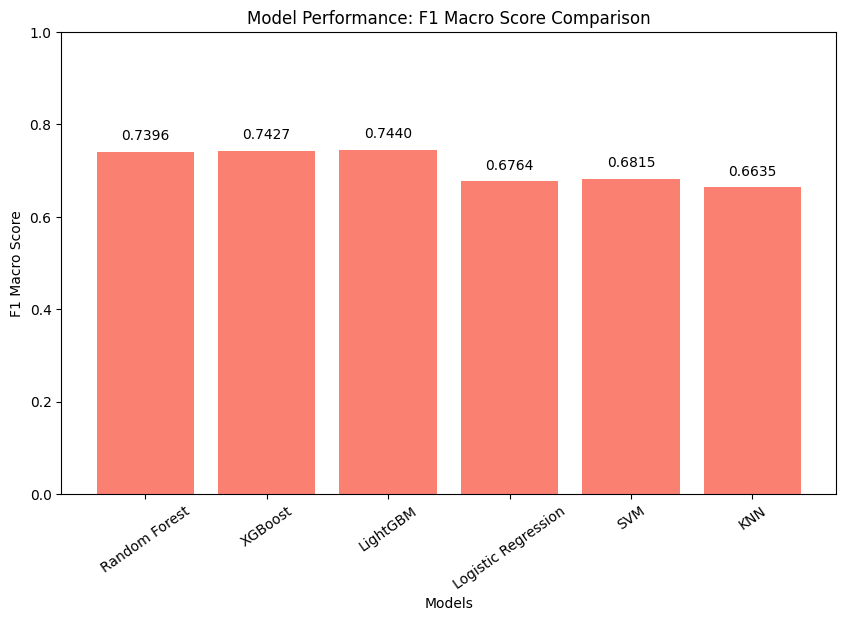

In [58]:
all_models = {
    "Random Forest": (rf_model_reduced, X_val_reduced),
    "XGBoost": (xgb_model, X_val),
    "LightGBM": (lgb_model, X_val),
}

for model_name, pipeline in pipelines.items():
    all_models[model_name] = (pipeline, X_val)  

f1_macro_scores = {}

# Compute F1 Macro scores for all models
for name, (model, X_val_input) in all_models.items():
    y_val_pred = model.predict(X_val_input)  # Predict on validation set
    f1_macro = f1_score(y_val, y_val_pred, average='macro')  
    f1_macro_scores[name] = f1_macro

plt.figure(figsize=(10, 6))
bars = plt.bar(f1_macro_scores.keys(), f1_macro_scores.values(), color='salmon')
plt.xlabel('Models')
plt.ylabel('F1 Macro Score')
plt.title('Model Performance: F1 Macro Score Comparison')
plt.xticks(rotation=35)
plt.ylim(0, 1)

# Bar annotation
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height + 0.02,  # Y-coordinate, above the bar
        f"{height:.4f}",  # Text label
        ha="center",  # Horizontal alignment
        va="bottom",  # Vertical alignment
        fontsize=10,  # Font size
    )

plt.show()


#### Three Best Models (based on F1-macro)

1. [`LightGBM`](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) : 74.4%
2. [`XGBoost`](https://xgboost.readthedocs.io/en/stable/) : 74.3%
3. [`RandomForest `](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) : 73.9%

**Result Metric DataFrame**

In [59]:
results = []

for name, model in [("LightGBM", lgb_model), ("XGBoost", xgb_model), ("Random Forest", rf_model_reduced)]:
    if name == "Random Forest":
        X_train = X_train_reduced
        X_val_data = X_val_reduced
    else:
        X_train = X_train_resampled
        X_val_data = X_val

    # Train predictions and metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

    # Test predictions and metrics
    y_test_pred = model.predict(X_val_data)
    test_accuracy = accuracy_score(y_val, y_test_pred)
    test_f1_weighted = f1_score(y_val, y_test_pred, average='weighted')
    test_f1_macro = f1_score(y_val, y_test_pred, average='macro')

    results.append({
        "Model": name,
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test F1 Score (Weighted)": test_f1_weighted,
        "Test F1 Score (Macro)": test_f1_macro
    })

results_df = pd.DataFrame(results)
results_df

,Model,Training Accuracy,Test Accuracy,Test F1 Score (Weighted),Test F1 Score (Macro)
0,LightGBM,0.928681,0.866123,0.866799,0.744002
1,XGBoost,0.955271,0.871478,0.869110,0.742662
2,Random Forest,1.000000,0.865230,0.865207,0.739568


**Insights:**

* `Random Forest` model shows perfect training accuracy (1.000) but comparatively lower test accuracy (0.864) and F1 scores. This signifies overfitting.
* `XGBoost` achieves the highest test accuracy (0.871) and weighted F1 score (0.869), indicating strong performance overall, particularly for more dominant classes.
* `LightGBM` shows the most balanced performance between training and test sets


**ROC-AUC Curve**

* `ROC (Receiver Operating Characteristic)`: Plots the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) at different thresholds.
* `AUC (Area Under the Curve)`: Measures the overall performance. A score near 1 means excellent classification, while 0.5 means random guessing.

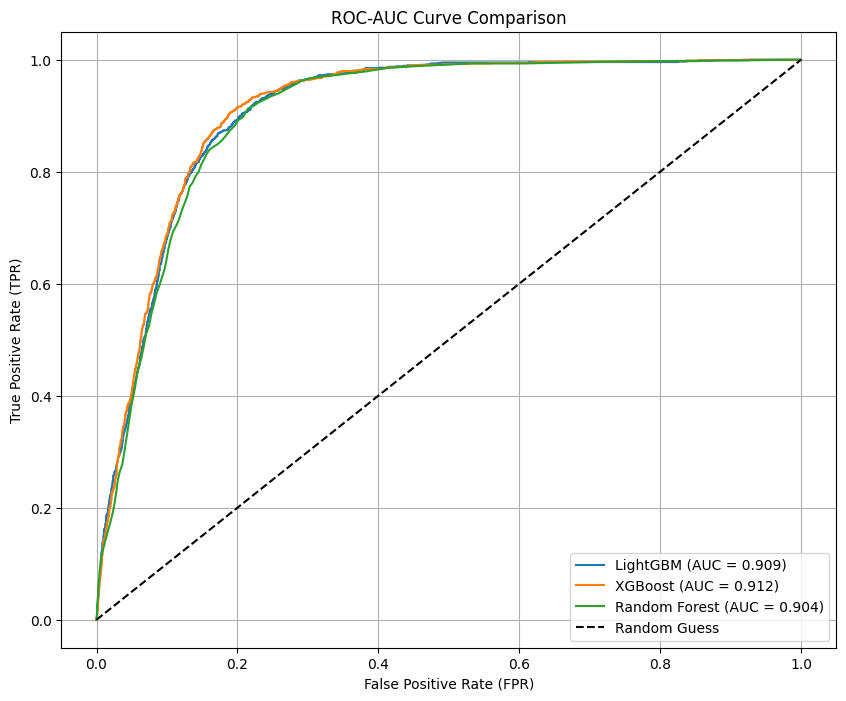

In [60]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in [("LightGBM", lgb_model), ("XGBoost", xgb_model), ("Random Forest", rf_model)]:
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_val)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()

plt.show()


**Insights**

- XGBoost has the highest AUC score (0.912), indicating the best overall performance in distinguishing between classes.
- LightGBM also has an AUC score of 0.909
- Random Forest has a slightly lower AUC score (0.904) compared to the other two but still performs well.
- The ROC curves for all three models are very close, suggesting that the models perform similarly for this particular dataset.

## Hyperparameter Tuning

**Hyperparameter Tuning of XGBoost**

In [61]:
param_grid = {
    'max_depth': [3, 5, 7],           # Control tree depth
    'learning_rate': [0.1, 0.05, 0.01],  # used for shrinksing the contribution of each tree during training
    'n_estimators': [50, 100, 150],    # Number of trees
    'reg_alpha': [0, 0.1, 0.5],        # L1 regularization 
    'reg_lambda': [1, 1.5, 2],         # L2 regularization
}

In [62]:
from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# grid_search.fit(X_train_resampled, y_train_resampled)

# best_params = grid_search.best_params_
# best_xgb_model = grid_search.best_estimator_

# print("Best Parameters:", best_params)

# # Evaluate the best model
# get_metrics(best_xgb_model, X_train_resampled, y_train_resampled, X_val, y_val)


#### Model Results

**Best Parameters** :

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'reg_alpha': 0.1, 'reg_lambda': 1}

**Test F1 Score (Macro Average)** : 0.7423605902805482

> Not an impovement of the previous XGBoost model

**Hyperparameter Tuning of Logistic Regression**

In [63]:
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],         # Regularization strength (C = 1/λ)
    'classifier__penalty': ['l2'],                       # Regularization type
    'classifier__solver': ['liblinear', 'saga'],         # solvers that work well with l1 and l2 regularization
    'classifier__max_iter': [100, 200]              # Max number of iterations to converge
}

In [64]:
# lr_pipeline = pipelines["Logistic Regression"]

# grid_search = GridSearchCV(estimator=lr_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# grid_search.fit(X_train_resampled, y_train_resampled)

# print("Best Hyperparameters:", grid_search.best_params_)

# best_lr_model = grid_search.best_estimator_

# get_metrics(best_lr_model, X_train_resampled, y_train_resampled, X_val, y_val)

#### Model Results

**Best Parameters** :

 {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
 
**Test F1 Score (Macro Average)** : 0.6805011708548686

> Impovement of the previous Logistic Regression model but still less performing than the best three models

## Prediction on Test Data & Submission

In [65]:
test_predictions = lgb_model.predict(test)

In [66]:
test['target'] = target_le.inverse_transform(test_predictions)

**Making Submission DataFrame**

In [67]:
submission = pd.DataFrame({
    'id': test.index,  
    'target': test['target']
})

In [68]:
submission.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,no
4,4,yes


In [69]:
submission.to_csv('submission.csv', index=False)

In [70]:
submission.shape

(10000, 2)